Group: Group 2
Members: Emre Ekici, Salih Ekici, Kyano Trevisan
Objective: EDA of the titanic dataset and creating models to make predictions on survival

Introduction:
In this notebook we will be using the titanic dataset to demonstrate our knowledge gains from the Cloud AI course. Our notebook will consist of 3 parts:
- The EDA (Exploratory Data Analysis)
- Training of the models and making predictions
- Conclusion

Before we start with anything, we are going to need to install our necessary libraries and import them. We are also going to load our data and view the first and last 10 rows to make sure there are no structural problems in our data.

In [1]:
#install libraries
#pip install pandas numpy matplotlib seaborn scikit-learn xlrd

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

Part 1 - The EDA:

In [2]:
#loading our file
df = pd.read_excel("../files/titanic3.xls")

#reading and displaying the first 10 rows
print("First 10 rows:")
df.head(10)



First 10 rows:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
#reading and displaying the last 10 rows
print("Last 10 rows:")
df.tail(10)

Last 10 rows:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


There seems to be no structural problems in our data. However there is one more feature we can extract from the name column, that being the title, we will get to this in a bit. For now we can take an in depth look at our dataframe to examine to get a bit more information about our data.

In [4]:
#check the columns and their dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
#check for missing values
df.isnull().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

Let's also make a correlation heatmap to see which features have a semblance of a linear relationship between each other.

C:\Users\emree\AppData\Local\Temp\ipykernel_10848\317048207.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


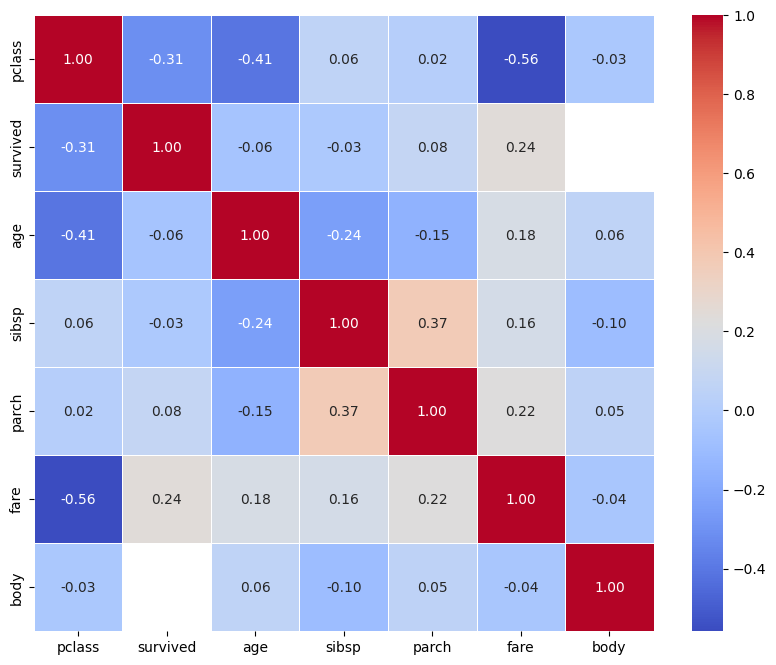

In [6]:
#correlation matrix
corr_matrix = df.corr()

# Set the figure size 
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the heatmap
plt.show()

Looks like we have a few things to take into account here, the most interesting being that pclass seems to have a correlation with 3 other features in our dataset.
Pclass is the passenger class which is from 1-3. 1 being the VIP class, 2 being the middle and 3 being the cheapest class. We can pretty much evaluate these as socioeconomic status for the passengers. The lower the value of pclass (ie the higher the socioeconomic class) the higher the survival rate, the age and the fare paid for their tickets. 
But it seems we don't have any information for the survival features correlation with the body feature. Why is that? If we look at our dataset we can see that the body column has unique values, the value is the 'number' of the body found. As these are all unique values they won't be very useful in training our model.
Let's change that feature to be a boolean value instead to display whether or not a body was found instead. Let's also do the same for the cabin and boats columns as they are in a similar situation. And lastly, let's use one hot encoding on the sex column to be able to use the gender of the passengers in our model. 

C:\Users\emree\AppData\Local\Temp\ipykernel_10848\3760756713.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


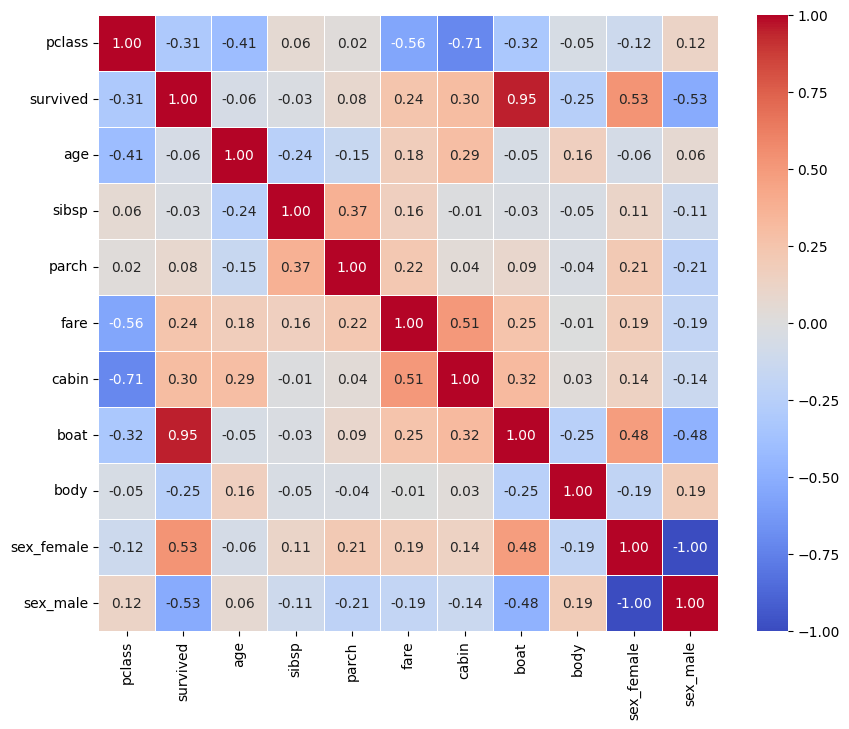

In [7]:
#replace missing values with a 0 and with a 1 for non null
df['body'] = df['body'].notna().astype(int)
df['cabin'] = df['cabin'].notna().astype(int)
df['boat'] = df['boat'].notna().astype(int)

# df['body'].value_counts()

#encode the sex
df['sex'] = df['sex'].astype('category')
enc = OneHotEncoder()

df_encoded =  enc.fit_transform(df[['sex']])
sex_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['sex']))

df = pd.concat([df, sex_encoded_df], axis=1)
df = df.drop('sex', axis=1)



#redraw the correlation 
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

And now we have a few more things to take into note. It seems that the higher class passenger is, the more likely that they had a cabin. passengers who managed to get onto a boat also survived most of the time, perhaps some fell to injuries or the cold. It also seems that pclass is overall the best feature to use as a guide to fill in any missing values as it seems to have the best correlation with other features. This also makes sense as the socioeconomic class of a person would be a good indicator of other generic features they might have. The sex of the passenger also seems to play a large role in their chances of survival and boarding a boat as that also makes sense. Women and children would have been prioritized. But if children would also be prioritized, why isn't there a stronger correlation between age and survival rate? This could be due to the ages column having many values. Let's try to "categorize" these ages into ranges. Let's go with 0-3 year olds being babies, 4-12 year olds being children, 13-18 being teenagers, 19-30 being young adults, 31-50 being adults, 50+ being elders. And before we do this, let's use the pclass average for the missing values of the passengers ages.

In [8]:
#find the average age of each pclass
median_age_by_pclass = df.groupby('pclass')['age'].median()

#loop through the items in our pclass ages and assign null values to the average of each age group
for pclass, median_age in median_age_by_pclass.items():
    df.loc[(df['pclass'] == pclass) & df['age'].isnull(), 'age'] = median_age

#verify that there are no more missing values in the age column
df['age'].isnull().any()

False

In [9]:

# Create a function to map ages to numerical categories
def map_age_to_category(age):
    if 0 <= age <= 3:
        return 1
    elif 4 <= age <= 12:
        return 2
    elif 13 <= age <= 18:
        return 3
    elif 19 <= age <= 30:
        return 4
    elif 31 <= age <= 50:
        return 5
    else:
        return 6

# Use the apply method to map ages to numerical categories
df['age'] = df['age'].apply(map_age_to_category)

# Rename the column to 'age_group'
df.rename(columns={'age': 'age_group'}, inplace=True)

#check output
# df['age_group'].unique()
df['age_group'].value_counts()

4    637
5    379
6    100
3     99
2     53
1     41
Name: age_group, dtype: int64

C:\Users\emree\AppData\Local\Temp\ipykernel_10848\2781686515.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


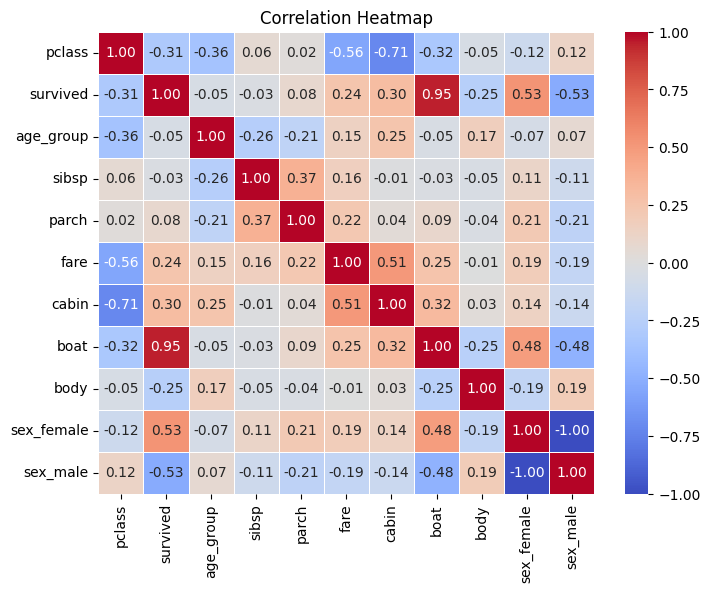

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the heatmap
plt.title('Correlation Heatmap')
plt.show()

Let's now extract the titles in each name to see if there are any interesting insights here.

In [11]:
#function to find the title in a name
def find_title(name):
    #split the names into substrings 
    strings = name.split()
    #go through the substrings and return the string ending with a '.'
    #all the titles end with a '.'
    for string in strings:
        if string.endswith('.'):
            return string[:-1]       
    return None
#create a new column in our dataframe and assign the title of each passenger
df['title'] = df['name'].apply(find_title)

#check dataframe to verify
#df.head()

#view the unique titles extracted
print(df['title'].unique())


['Miss' 'Master' 'Mr' 'Mrs' 'Col' 'Mme' 'Dr' 'Major' 'Capt' 'Lady' 'Sir'
 'Mlle' 'Dona' 'Jonkheer' 'Countess' 'Don' 'Rev' 'Ms']


We have a bunch of titles apparently. It seems like we can seperate these titles into a few groups. After a bit of googling we can group certain titles like Col, Dr, Major, Capt etc together as more of an 'upper class' grouping.

In [12]:
#group the titles together
df['title'] = df['title'].replace(['Col', 'Dr', 'Major', 'Capt', 'Lady', 'Sir', 'Dona', 'Jonkheer', 'Countess', 'Don', 'Rev'], 'Elite')
df['title'] = df['title'].replace('Mlle', 'Miss')
df['title'] = df['title'].replace('Ms', 'Mrs')
df['title'] = df['title'].replace('Mme', 'Mrs')

Let's see the survival rate for the passengers based on their titles now.

C:\Users\emree\AppData\Local\Temp\ipykernel_10848\2954889804.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate, x="title", y="survived", palette="viridis")


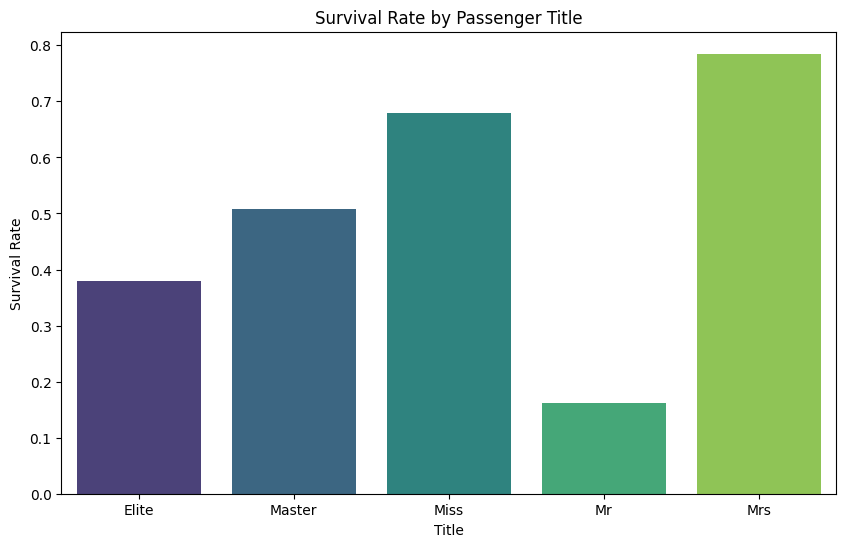

In [13]:
# Calculate the survival rate by title
survival_rate = df.groupby("title")["survived"].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rate, x="title", y="survived", palette="viridis")
plt.title("Survival Rate by Passenger Title")
plt.xlabel("Title")
plt.ylabel("Survival Rate")
plt.show()

Now that that's settled, let's check the number of missing values per column we have left to determine how many fields we would have to fill and whether it is feasible.

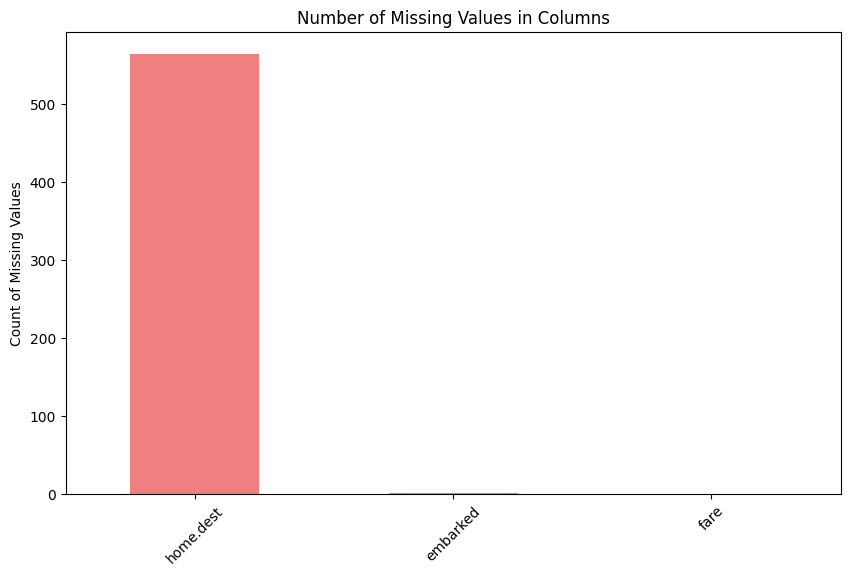

In [14]:

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

# Create a bar chart for columns with missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='lightcoral')
plt.title("Number of Missing Values in Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()


Okay, seems like we have barely any missing values in embarked. We can simply replace these values with Unknown as they won't have any significant effect on our model. As for home.dest, we will just drop that column as well as there are too many missing values and no realiable way to truly determine where a passenger was headed. As for fare, we can just use the pclass as estimate the missing fare values.

In [15]:
#calculate the correlation between 'fare' and the other features
correlations = df.corr()['fare'].abs()

#drop fare 
correlations = correlations.drop('fare')
# Find the feature with the highest absolute correlation
max_correlation_feature = correlations.idxmax()
max_correlation_value = correlations[max_correlation_feature]

# Print the result
print("Feature with the highest correlation with 'fare':", max_correlation_feature)

#print the correlation values
print(correlations)


Feature with the highest correlation with 'fare': pclass
pclass        0.558629
survived      0.244265
age_group     0.148030
sibsp         0.160238
parch         0.221539
cabin         0.507253
boat          0.252717
body          0.007752
sex_female    0.185523
sex_male      0.185523
Name: fare, dtype: float64


C:\Users\emree\AppData\Local\Temp\ipykernel_10848\4079315688.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['fare'].abs()


In [16]:
# Find the average fare of each pclass
median_fare_by_pclass = df.groupby('pclass')['fare'].median()

# Loop through the items in our pclass fares and assign null values to the average of each fare group
for pclass, median_fare in median_fare_by_pclass.items():
    df.loc[(df['pclass'] == pclass) & df['fare'].isnull(), 'fare'] = median_fare

# Verify that there are no more missing values in the fare column
df['fare'].isnull().any()


False

We're almost ready to begin training our models to make predictions. Before we do so though, let's make sure we don't forget to encode our title column and embarked column as well.

In [17]:
#replace null values with U for unknown in embarked
df['embarked'].fillna("U", inplace=True)
df['embarked'].value_counts()

S    914
C    270
Q    123
U      2
Name: embarked, dtype: int64

In [18]:
#encode the Title 
df['title'] = df['title'].astype('category')

df_encoded =  enc.fit_transform(df[['title']])
title_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['title']))

df = pd.concat([df, title_encoded_df], axis=1)
df = df.drop('title', axis=1)


In [19]:
#encode the embarking location
df['embarked'] = df['embarked'].astype('category')

df_encoded =  enc.fit_transform(df[['embarked']])
embarked_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['embarked']))

df = pd.concat([df, embarked_encoded_df], axis=1)
df = df.drop('embarked', axis=1)

Now let's begin training our models. Before we begin, let's define our feature columns and our label. And also split our data into a training and test set.

In [20]:
# begin making the model
# split the data
feature_cols = df.columns.tolist()
feature_cols.remove('survived')
feature_cols.remove('name')
feature_cols.remove('ticket')
feature_cols.remove('home.dest')
#uncomment the following line to disable "cheats"
#feature_cols.remove('body')




X = df[feature_cols]
y = df['survived']



print(feature_cols)
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test



['pclass', 'age_group', 'sibsp', 'parch', 'fare', 'cabin', 'boat', 'body', 'sex_female', 'sex_male', 'title_Elite', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs', 'embarked_C', 'embarked_Q', 'embarked_S', 'embarked_U']


In [21]:
#verify contents of X
print(X)

      pclass  age_group  sibsp  parch      fare  cabin  boat  body  \
0          1          4      0      0  211.3375      1     1     0   
1          1          1      1      2  151.5500      1     1     0   
2          1          1      1      2  151.5500      1     0     0   
3          1          4      1      2  151.5500      1     0     1   
4          1          4      1      2  151.5500      1     0     0   
...      ...        ...    ...    ...       ...    ...   ...   ...   
1304       3          3      1      0   14.4542      0     0     1   
1305       3          4      1      0   14.4542      0     0     0   
1306       3          4      0      0    7.2250      0     0     1   
1307       3          4      0      0    7.2250      0     0     0   
1308       3          4      0      0    7.8750      0     0     0   

      sex_female  sex_male  title_Elite  title_Master  title_Miss  title_Mr  \
0            1.0       0.0          0.0           0.0         1.0       0.0   
1

In [22]:
#verify contents of y
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64


In [23]:
clf_rf = RandomForestClassifier(n_estimators=1001, max_leaf_nodes=16, n_jobs=1)
clf_lr = LogisticRegression(max_iter=1000)

clf_rf = clf_rf.fit(X_train, y_train)
clf_lr = clf_lr.fit(X_train, y_train)

C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


rf accuracy: 0.9541984732824428


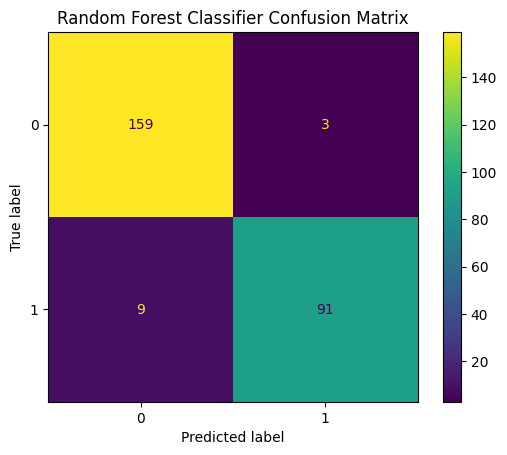

In [24]:
rf_y_pred = clf_rf.predict(X_test)

print("rf accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

#random forest confusion matrix

rf_cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=np.unique(y))

disp.plot()
plt.title("Random Forest Classifier Confusion Matrix")

plt.show()

C:\Users\emree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


lr accuracy: 0.9541984732824428


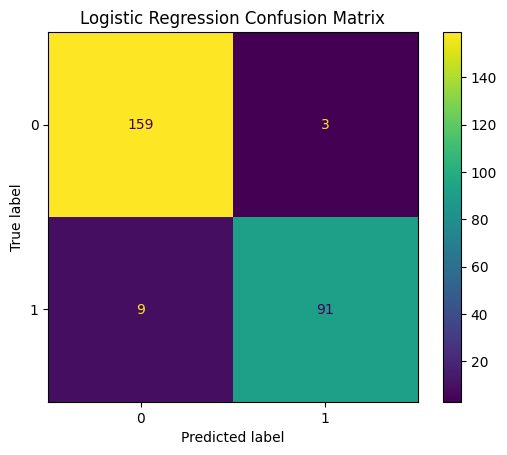

In [25]:
lr_y_pred = clf_lr.predict(X_test)

print("lr accuracy:", metrics.accuracy_score(y_test, lr_y_pred))

#lr confusion matrix

lr_cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=np.unique(y))

disp.plot()
plt.title("Logistic Regression Confusion Matrix")

plt.show()

<Axes: >

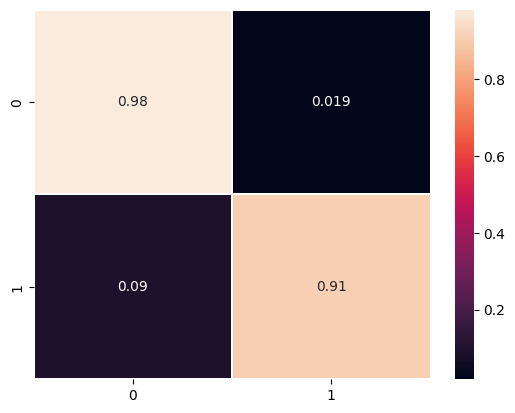

In [26]:
#Create normalized Confusion Matrix
rf_cm_normalized = rf_cm.astype('float') / rf_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(rf_cm_normalized, annot=True, linewidths = 0.01)

<Axes: >

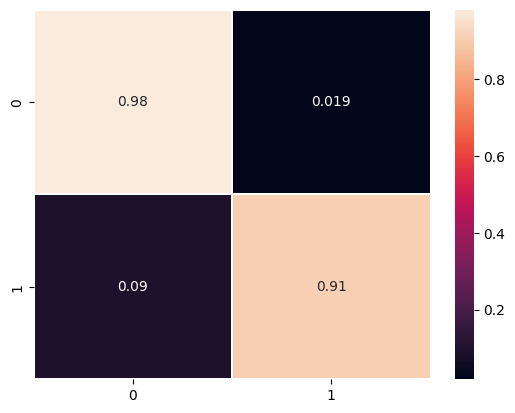

In [27]:
#Create normalized Confusion Matrix
lr_cm_normalized = lr_cm.astype('float') / lr_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(lr_cm_normalized, annot=True, linewidths = 0.01)

In [28]:
# from pycaret.classification import *
# clf1 = setup(data = df, target = 'survived')
# best_model = compare_models()

In [29]:
# evaluate_model(best_model)

In [30]:
# tuned_best_model = tune_model(best_model)

# AWS

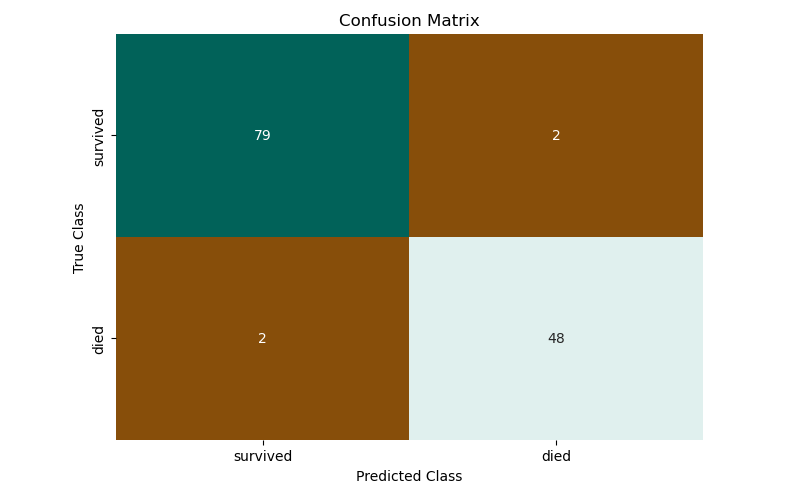